In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_validate , cross_val_score , cross_val_predict
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , accuracy_score


In [11]:
data = pd.read_csv("HousingData.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
# first 5 rows 
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [13]:
# description of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


([<matplotlib.patches.Wedge at 0x239d6dc9b80>,
 [Text(-0.9064866616192165, 0.6231227265205854, 'Not_Null'),
  Text(0.9064866324487352, -0.6231227689562884, 'Null')],
 [Text(-0.49444726997411803, 0.33988512355668293, '80.83%'),
  Text(0.49444725406294643, -0.33988514670342995, '19.17%')])

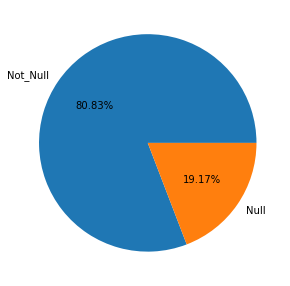

In [14]:
# visualize data null values
plt.figure(figsize=(5,5))
plt.pie([data.shape[0],data.isnull().sum().sum()],labels = ['Not_Null','Null'],autopct='%1.2f%%')

In [15]:
# data corr
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


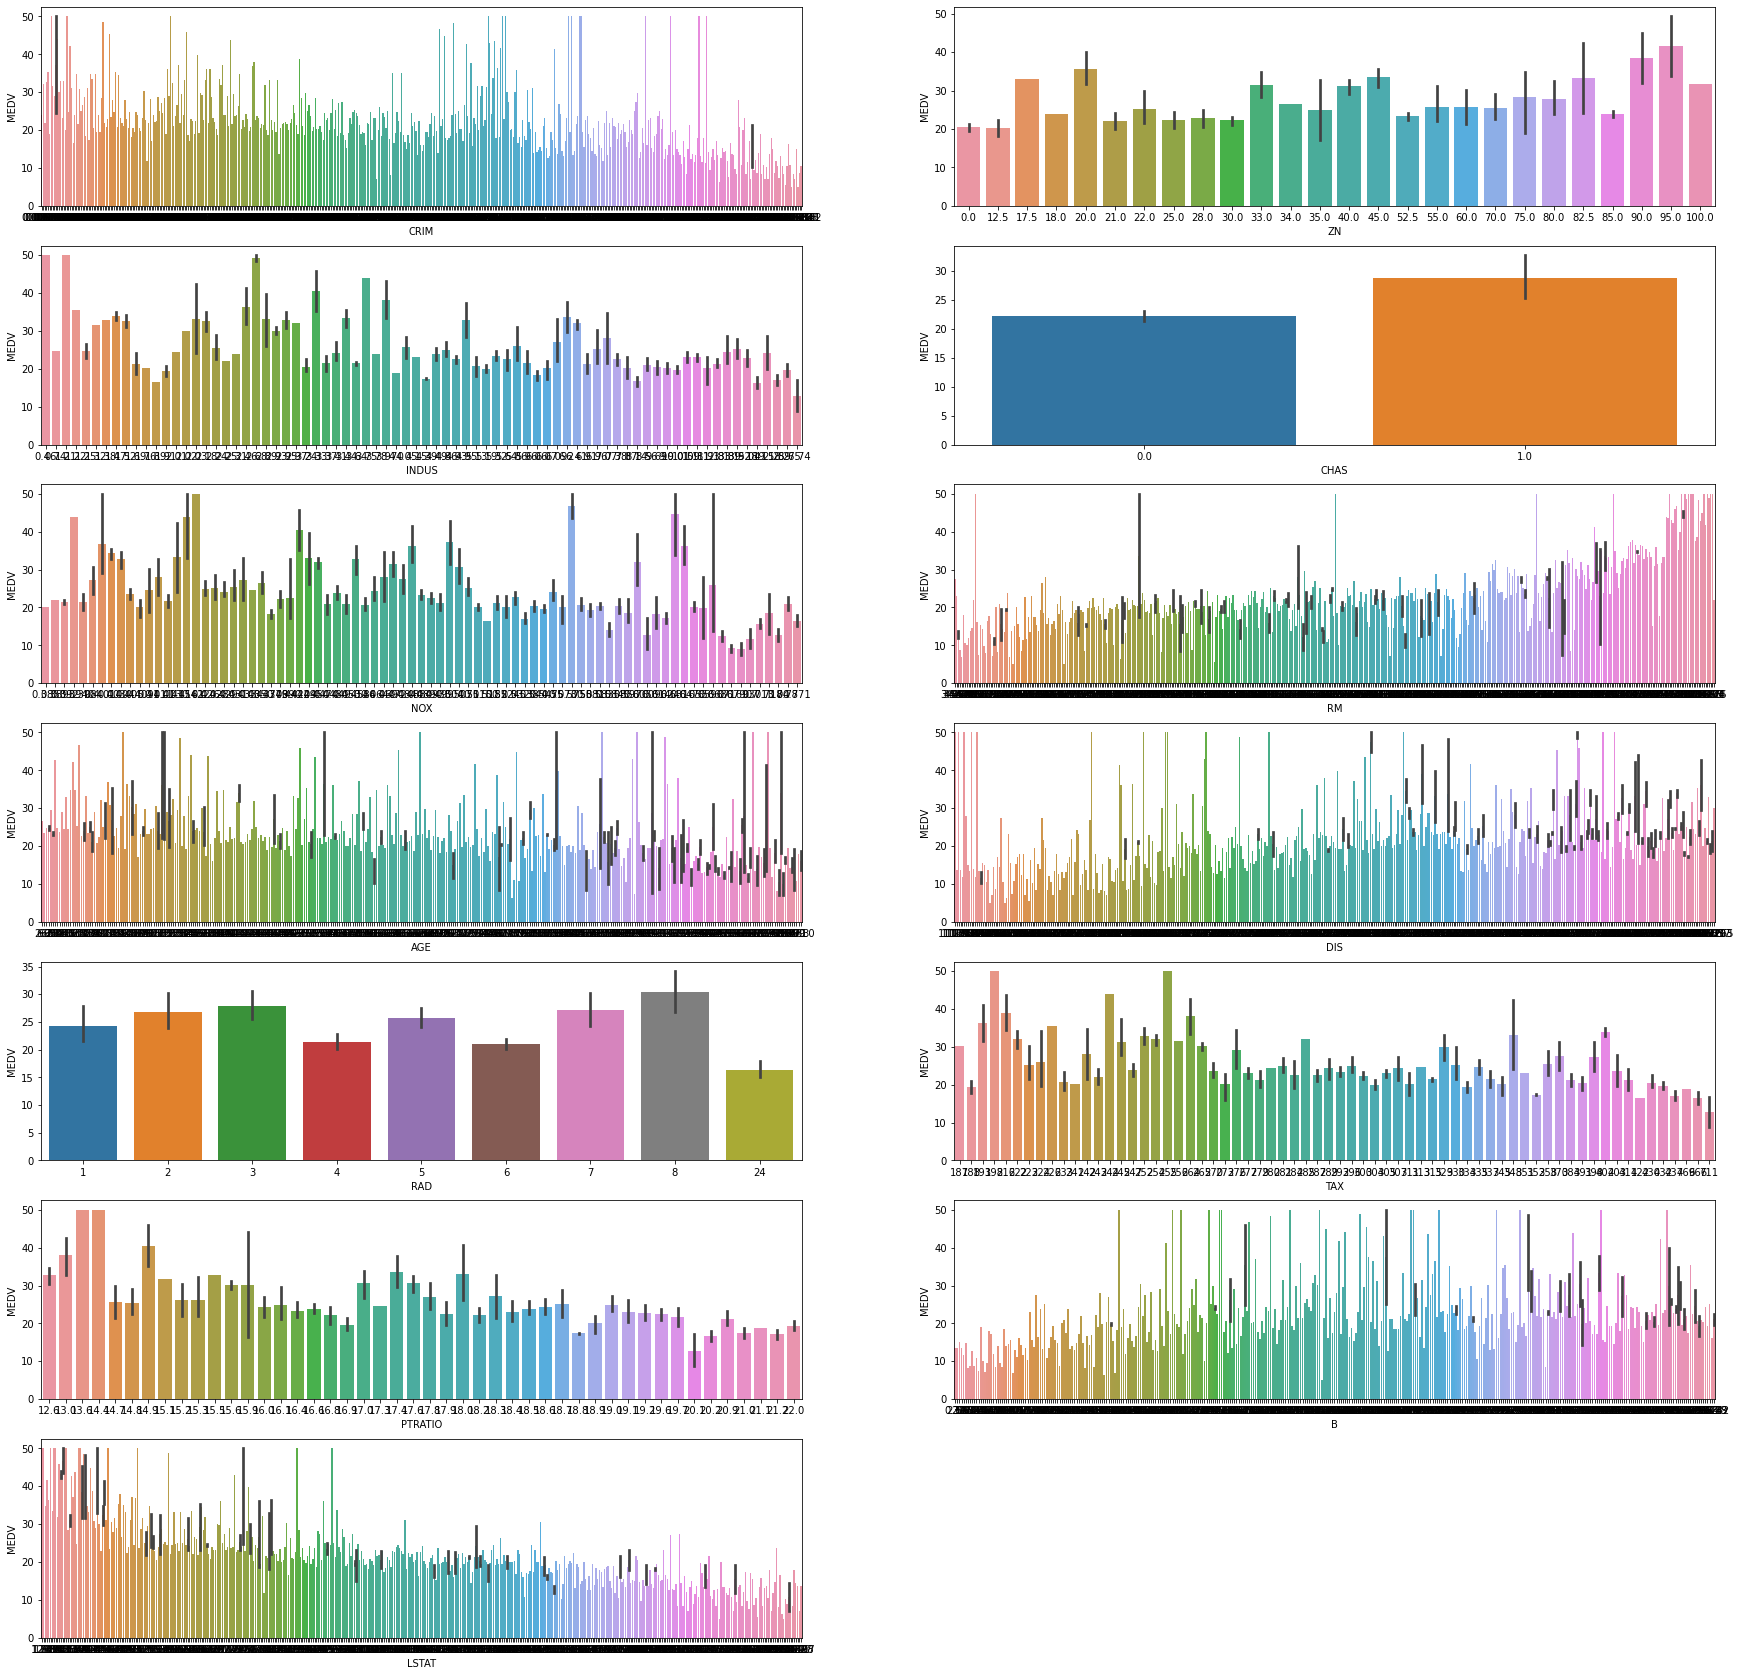

In [16]:
# see relation with target
feature_name = list(data.columns[:-1])
plt.figure(figsize=(30,30))
for i in range(len(feature_name)):
  plt.subplot(7,2,i+1)
  sns.barplot(x=data[feature_name[i]],y=data['MEDV'])

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

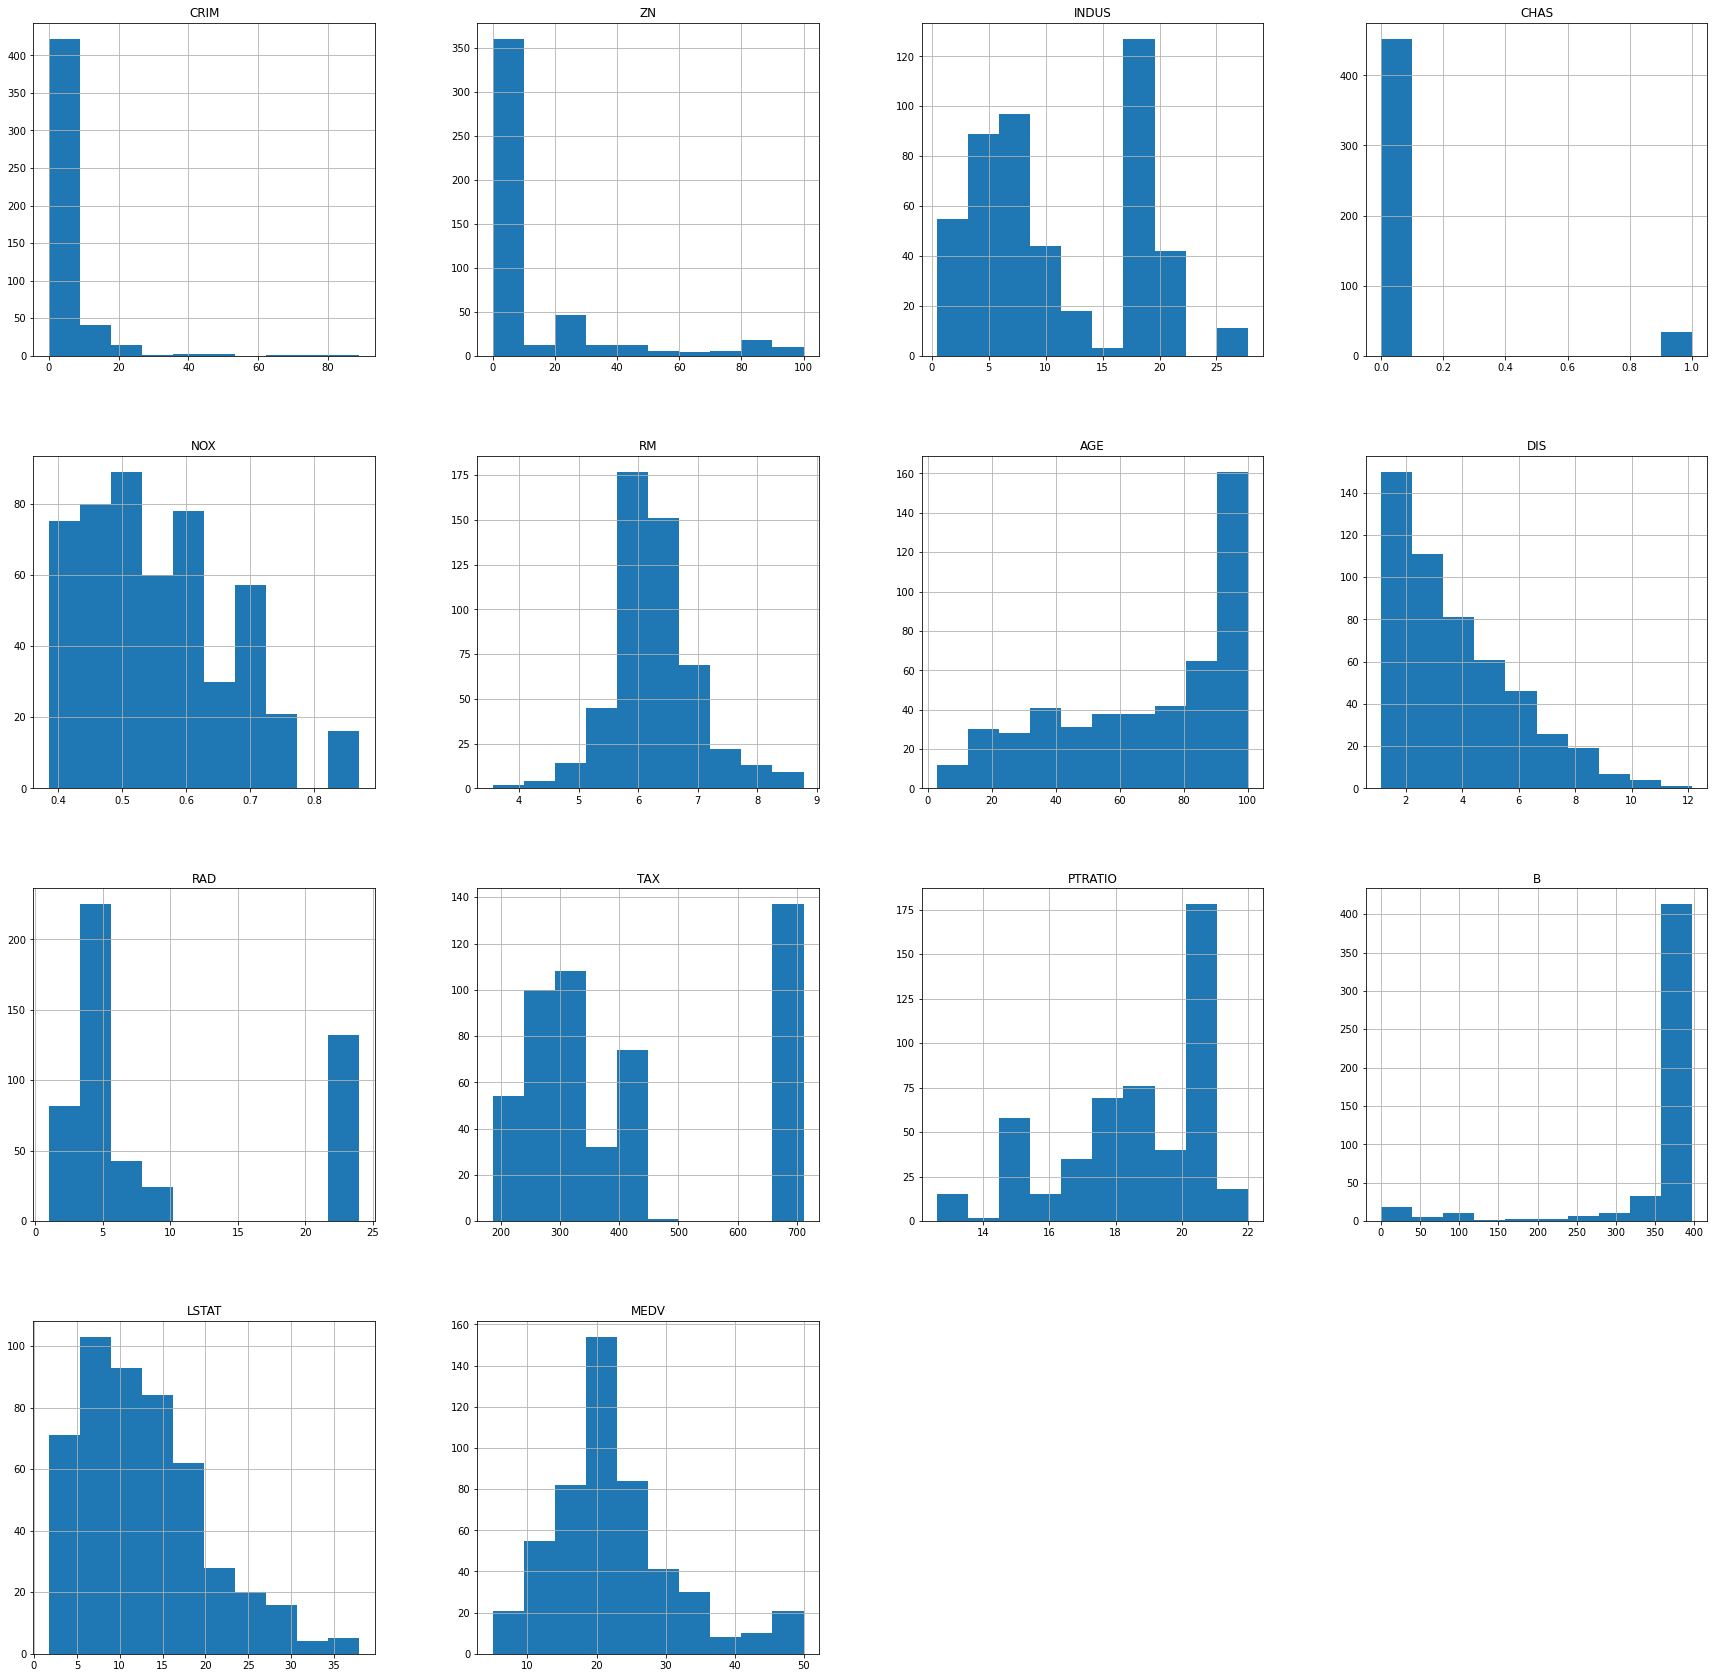

In [17]:
# see ranges of feature
data.hist(figsize=(30,30))

In [18]:
# Data Preparation
# drop NOX  feature has low relation in dataset
data.drop('NOX',axis=1,inplace=True)

In [19]:
# cleaning null values
Data_copy = SimpleImputer().fit_transform(data)

In [20]:
import pandas as pd
data = pd.DataFrame(Data_copy , columns = data.columns)

In [21]:
# seeing null values
data.isnull().sum().sum()

0

In [22]:
data.shape

(506, 13)

In [23]:
# determine inputs , output
X = data.drop('MEDV',axis=1)
y = data['MEDV']

In [24]:
# scaling data
X = StandardScaler().fit_transform(X,y)

In [25]:
# data description
X = pd.DataFrame(X , columns =data.columns[:-1])
X.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,1.294529e-16,3.414046e-16,-7.191217e-16,3.510587e-18,-5.189086e-17,4.466496e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.748711e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.223285e-01,-4.896385e-01,-1.587438e+00,-2.798513e-01,-3.880249e+00,-2.393758e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.568047e+00
25%,-4.133192e-01,-4.896385e-01,-8.806806e-01,-2.798513e-01,-5.686303e-01,-8.242098e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.829837e-01
50%,-3.890710e-01,-4.896385e-01,-1.769121e-01,-2.798513e-01,-1.084655e-01,2.163800e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.028336e-01
75%,-5.201739e-17,-7.757562e-17,1.048332e+00,-2.798513e-01,4.827678e-01,9.140585e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,5.501962e-01
max,9.998958e+00,3.877481e+00,2.488742e+00,3.720376e+00,3.555044e+00,1.148442e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.604806e+00


In [26]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape

(404, 12)

In [28]:
y_test.shape

(102,)

In [29]:
# Building A Model
params_svr = {
    
    'C':[5,20,100,200],
    'kernel':['rbf','linear']
}

In [30]:
params_rfr = {
    'n_estimators':[250,1000,2000,2500],
    'min_samples_split':[2,3,4,5]
}

In [31]:
gbr = GradientBoostingRegressor()

In [32]:
lr = LinearRegression()

In [33]:
rdg = Ridge()

In [34]:
svr = SVR()

In [35]:
rfr = RandomForestRegressor()

In [36]:
gs_svr = GridSearchCV(svr,params_svr)

In [37]:
gs_rfr = GridSearchCV(rfr,params_rfr)

In [38]:
# Train Model

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_validate , cross_val_score , cross_val_predict
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , accuracy_score

gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
svr.fit(X_train,y_train)

SVR()

In [41]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
rdg.fit(X_train,y_train)

Ridge()

In [43]:
gs_svr.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [5, 20, 100, 200], 'kernel': ['rbf', 'linear']})

In [44]:
gs_rfr.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [250, 1000, 2000, 2500]})

In [45]:
# Test Model
gbr.predict(X_test)

array([27.75499874, 47.62679753, 19.46223523, 23.3308646 , 18.96303418,
       19.94407714, 23.0781941 , 22.92592402, 22.03291307, 19.13543465,
       20.39154932, 22.09623853, 31.81492247, 34.19656281, 21.71109507,
       19.40553037, 15.52209876, 32.16730947, 20.69075038, 32.53261465,
       21.10688189, 24.3682003 , 23.56874058, 20.32756   ,  8.35213182,
       44.14198337, 28.43553152, 27.43488022, 27.56178523, 19.19748364,
       13.97100343, 21.12013437, 26.06299132, 17.97955522, 17.10340049,
       34.97106997, 19.8921242 , 32.46768483, 11.29163116, 21.228836  ,
       11.9711145 , 27.9557926 , 22.32901493, 33.66911514, 19.73391593,
       33.53718635, 45.82122989, 24.62105864, 23.14470229, 23.81121077,
       10.72947915, 21.71732435, 12.57690306, 13.1461618 , 23.12106394,
       23.7197225 , 23.37880658, 19.9659706 , 21.25340019, 17.4598465 ,
       16.20480027, 10.92849222, 19.30243126, 16.80413241, 34.26299363,
       48.16958944, 15.55817203, 11.51747893, 25.948437  , 19.98

In [46]:
lr.predict(X_test)

array([32.58929794, 37.72634017, 16.99510016, 23.32837725, 26.44907335,
       22.5761885 , 23.85819785, 24.59149421, 23.44035593, 21.14598925,
       23.54807145, 21.89138838, 32.55000367, 31.48577387, 20.39930325,
       20.29330669, 14.22294099, 34.06825187, 20.17644224, 33.14849516,
       20.96533029, 24.56221543, 22.69687498, 20.15537555,  9.77529668,
       36.60988404, 31.43507385, 28.09931639, 29.64532088, 14.71300553,
       20.34560298, 13.30574024, 26.63497995, 19.04956646, 14.79733589,
       35.98473578, 20.2005642 , 34.14590887, 13.46950232, 21.89690656,
       18.50111072, 27.63712148, 22.20259285, 23.70902961, 22.20354014,
       35.96881066, 40.39664485, 25.15993391, 25.73628495, 26.86097207,
       12.1383676 , 20.73079184, 10.42944483, 13.04852913, 23.51273592,
       26.95614259, 22.82949238, 19.73789881, 21.72716745, 17.73304663,
       19.93631106, 12.83395584,  8.03477279, 16.70660515, 25.16660108,
       45.35657662, 20.37868833, 14.22601663, 28.45448711, 20.58

In [47]:
svr.predict(X_test)

array([30.61590236, 36.39121531, 18.70006597, 24.58208216, 21.66341092,
       19.5797178 , 22.91667511, 23.47120351, 22.02462265, 20.24010291,
       21.22328878, 22.84451902, 32.62602314, 28.55699301, 20.73256699,
       20.29587524, 15.89815835, 33.04099879, 20.83585208, 31.0128426 ,
       20.4430254 , 22.58297903, 22.83488962, 19.85670611, 20.61279085,
       27.45095557, 28.53798435, 25.18533121, 28.33243688, 16.98675685,
       16.16057163, 20.03570561, 24.11369721, 17.60305891, 15.38716538,
       27.21927648, 19.69571928, 29.84384008, 12.55571437, 20.51004407,
       13.73050211, 26.02814024, 21.91355437, 25.33267633, 21.38603553,
       32.31739513, 27.48178381, 23.10070387, 24.50564192, 24.86197871,
       11.76136655, 20.39420585, 10.45740832, 14.3465003 , 17.68821061,
       25.99116967, 21.81899944, 18.93028173, 19.80257908, 16.68269027,
       15.97799599, 13.59768934, 15.79104976, 16.15278491, 26.69984116,
       25.028547  , 15.43825435, 13.40899599, 27.82426039, 19.83

In [48]:
rfr.predict(X_test)

array([27.915, 47.122, 20.136, 23.49 , 17.54 , 19.718, 23.093, 25.379,
       20.87 , 19.222, 20.407, 22.897, 32.035, 34.465, 21.327, 19.616,
       15.345, 34.723, 21.271, 31.83 , 21.301, 24.909, 22.531, 19.906,
       11.525, 44.258, 29.505, 27.823, 28.588, 19.127, 14.142, 20.733,
       27.087, 18.116, 18.539, 34.588, 19.241, 32.723, 12.11 , 20.677,
       11.895, 26.815, 21.99 , 32.476, 20.893, 33.35 , 46.158, 22.801,
       23.816, 23.865, 11.604, 20.433, 11.337, 14.333, 27.724, 23.272,
       22.724, 20.04 , 21.02 , 18.218, 20.828, 13.08 , 18.081, 17.325,
       31.543, 44.919, 14.918, 12.32 , 27.393, 21.181, 23.637, 21.279,
       29.009, 23.878, 23.967, 45.723, 21.047, 19.864, 19.061, 23.157,
       19.714, 35.262, 31.962, 13.137, 28.95 , 13.015, 28.524, 24.33 ,
       20.205, 24.603, 26.062, 20.687, 12.03 , 44.219, 21.803, 48.282,
       24.061, 24.249, 19.116, 45.213, 10.435, 15.881])

In [49]:
rdg.predict(X_test)

array([32.58907038, 37.69160789, 17.03629078, 23.43257008, 26.45970548,
       22.57376081, 23.85206771, 24.61063205, 23.4145303 , 21.12911482,
       23.52864924, 21.89482889, 32.52992375, 31.51367094, 20.43517877,
       20.32336379, 14.24899937, 34.07674332, 20.2143959 , 33.10351065,
       20.99751305, 24.53744802, 22.76193219, 20.18044603,  9.83290114,
       36.59013157, 31.42518486, 28.09051875, 29.66914059, 14.75339544,
       20.3339874 , 13.40620366, 26.62900096, 19.04027322, 14.81731146,
       35.96052128, 20.22488928, 34.16533356, 13.47563706, 21.88709366,
       18.49674672, 27.63678401, 22.22388353, 23.7531297 , 22.2022613 ,
       35.92780472, 40.37018603, 25.15102163, 25.72810991, 26.82591713,
       12.13263415, 20.72196728, 10.4342224 , 13.03673216, 23.49704886,
       26.98460035, 22.82979927, 19.75883502, 21.70383787, 17.75453943,
       19.92028652, 12.82807908,  8.07654133, 16.73044165, 25.18637638,
       45.3123625 , 20.36907021, 14.23235169, 28.44573343, 20.60

In [50]:
gs_svr.predict(X_test)

array([31.42250151, 46.40343109, 19.67570761, 16.97256459, 22.68056308,
       21.30540986, 23.29874324, 24.01282808, 22.00428488, 19.63232328,
       23.16918449, 23.99462387, 34.53026039, 34.75987392, 20.52607608,
       20.89870778, 15.58435263, 36.43027436, 20.74335101, 34.1723106 ,
       20.22828641, 26.4318905 , 20.35137337, 20.69804909, 18.11112314,
       37.29587492, 29.767219  , 26.72816067, 28.08365293, 19.51188794,
       15.26976023, 26.85511304, 25.16329513, 18.55928013, 16.7772952 ,
       34.34742257, 19.67572905, 32.31670416, 11.13807088, 19.58276531,
       13.23152747, 26.92831349, 21.58904571, 30.12583707, 21.12731697,
       35.76731664, 36.61944086, 21.56175288, 24.41900069, 26.29485897,
       13.23730951, 20.92551848,  9.03350849, 10.06853601, 21.6352142 ,
       24.26478682, 20.65698507, 19.8551587 , 19.99099603, 18.21710339,
       13.74420968,  8.34558201, 14.44736805, 17.72800833, 26.0614576 ,
       33.20072972, 14.12611138, 11.65566324, 28.73135134, 21.16

In [51]:
gs_rfr.predict(X_test)

array([27.80855206, 47.19409667, 19.76341476, 24.06207238, 17.43409524,
       19.70434667, 23.09173143, 25.23567619, 21.00333   , 19.4493    ,
       20.24990667, 22.45026667, 32.48130762, 34.33617524, 21.49283905,
       19.57280524, 15.42164317, 34.2936    , 21.02299143, 31.9100219 ,
       21.07601333, 24.79888667, 22.74178762, 19.72817238, 11.5435219 ,
       43.97862905, 29.18524571, 29.00676667, 28.75059111, 18.93578905,
       14.03232667, 20.87463429, 27.90178667, 18.14819048, 18.31168   ,
       34.14766   , 18.64911714, 32.38103333, 12.20564667, 20.4974419 ,
       11.76696762, 26.68853333, 21.54325619, 33.04359333, 20.57574857,
       33.48136857, 46.03041333, 23.179     , 23.81504667, 23.76382381,
       11.39292095, 20.61713714, 11.02460333, 14.47516857, 27.33764762,
       24.05606286, 22.13113   , 20.29169238, 20.93051714, 18.5419    ,
       20.83820857, 12.95876   , 18.07468   , 17.59822   , 31.78444   ,
       43.92266667, 16.85412762, 12.79283048, 27.58369524, 20.85

In [52]:
# Model Evaluation
gbr.score(X_test,y_test)

0.907770436088404

In [53]:
lr.score(X_test,y_test)

0.7152825935120526

In [54]:
rdg.score(X_test,y_test)

0.7150738974613677

In [55]:
svr.score(X_test,y_test)

0.5581003200818091

In [56]:
rfr.score(X_test,y_test)

0.8745231441202593

In [57]:
mean_squared_error(y_test,lr.predict(X_test))

27.86564614361092

In [58]:
mean_squared_error(y_test,rdg.predict(X_test))

27.886071485256466

In [59]:
mean_squared_error(y_test,svr.predict(X_test))

43.24927043790173

In [60]:
mean_squared_error(y_test,rfr.predict(X_test))

12.280575705882352

In [61]:
cv1 = cross_validate(rfr,X,y,cv=2,return_train_score=True)
cv2 = cross_validate(rfr,X,y,cv=2,scoring = ('r2','neg_mean_squared_error'))

In [62]:
cv1['train_score']

array([0.97620928, 0.98467562])

In [63]:
cv1['test_score']

array([0.81831486, 0.62306462])

In [64]:
cv2['test_neg_mean_squared_error']

array([-12.14860304, -34.95283902])

In [65]:
cv2['test_r2']

array([0.82457718, 0.6253181 ])

In [66]:
gs_svr.best_params_

{'C': 100, 'kernel': 'rbf'}

In [67]:
gs_rfr.best_params_

{'min_samples_split': 3, 'n_estimators': 250}

In [68]:
gs_svr.best_score_

0.8335697309344529

In [69]:
gs_rfr.best_score_

0.8282548570490608